In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
from helper_functions import data_processing_helper, ml_analysis_helper
%load_ext autoreload
%autoreload 2

In [4]:
execution_data = pd.read_csv("https://gitlab.com/lenapster/faascache/-/raw/master/machine-learning/data/data_image_caching.csv")
image_attributes = pd.read_csv("https://gitlab.com/lenapster/faascache/-/raw/master/machine-learning/data/features_image.csv", delimiter=';')

In [5]:
execution_data.groupby("function")

In [6]:
image_attributes["image_url"] = image_attributes["url"].map(lambda x: x.split("/")[-1])

In [7]:
execution_data = execution_data.drop(["init_ms", "end_ms"], axis=1)
image_attributes = image_attributes.drop(["sizex", "sizey", "url"], axis=1)

In [8]:
image_attributes = image_attributes.rename({"file_size": "file_size_argument"})

In [9]:
execution_data["name"] = execution_data["name"].map(lambda x: x + "_argument")

In [10]:
data = data_processing_helper.Dataset(execution_data)
data.split_into_functions('function', 'name', 'arguments', 'format_argument')

data = data_processing_helper.Dataset(execution_data)
data.split_into_functions('function', 'name', 'arguments', 'format_argument')

In [11]:
for function in data.functions:
    if "url_argument" in data.functions[function].function_dataset.columns:
        data.functions[function].function_dataset = data.functions[function].function_dataset.merge(image_attributes, how="left", left_on="url_argument", right_on="image_url").drop(["image_url"], axis=1)
        data.functions[function].function_dataset = data.functions[function].function_dataset.drop("url_argument", axis = 1)

In [12]:
for function in data.functions:
    indexes = ['image_size'] + [x for x in data.functions[function].function_dataset.columns if "_argument" in x]
    data.functions[function].split_data(indexes, ['processing_time'], 0.5, 12)

In [13]:
for function in data.functions:
    decision_tree_model = DecisionTreeRegressor(random_state=12)
    model = ml_analysis_helper.Model('decision_tree_model' , decision_tree_model, data.functions[function])
    data.functions[function].add_model(model)

In [14]:
data.group_function_values('decision_tree_model')

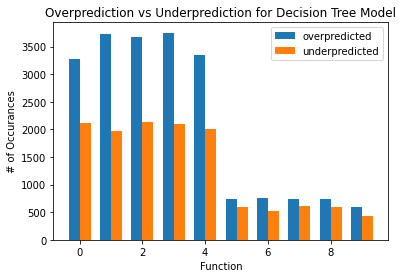

In [15]:
width = 0.35  

fig, ax = plt.subplots()

x = np.arange(len(data.labels)) 
ax.bar(x- width/2, data.model_values['decision_tree_model']['overpredicted'], width, label='overpredicted')
ax.bar(x+ width/2, data.model_values['decision_tree_model']['underpredicted'], width,
       label='underpredicted')
ax.set_xlabel('Function')
ax.set_ylabel('# of Occurances')
ax.set_title('Overprediction vs Underprediction for Decision Tree Model')
ax.legend()

plt.show()

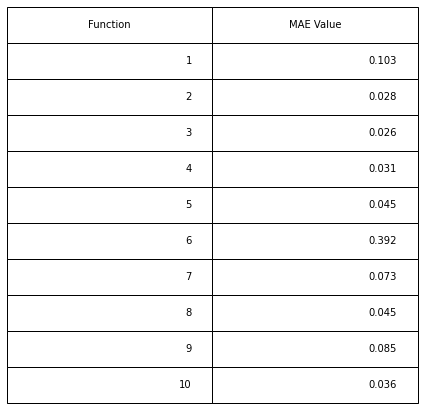

In [16]:
mae_function_values = []
temp_mae = data.model_values['decision_tree_model']['mae_values']
for function in data.functions:
    mae_function_values.append([function, round(temp_mae[function - 1], 3)])

fig, ax = plt.subplots()


ax.axis('off')
fig.patch.set_visible(False)
fig.tight_layout()
table = ax.table(cellText=mae_function_values ,colLabels=['Function', 'MAE Value'],loc='center')
table.set_fontsize(10)
table.scale(1,3)
plt.show()

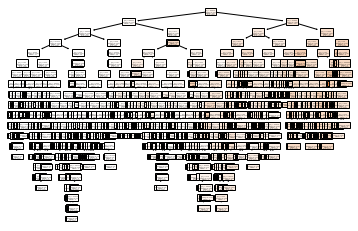

In [17]:
plt.figure()
plot_tree(data.functions[1].models['decision_tree_model'].model, filled = True)
plt.show()

# Decision Tree Optimization 

## Adding a constant amount to each function

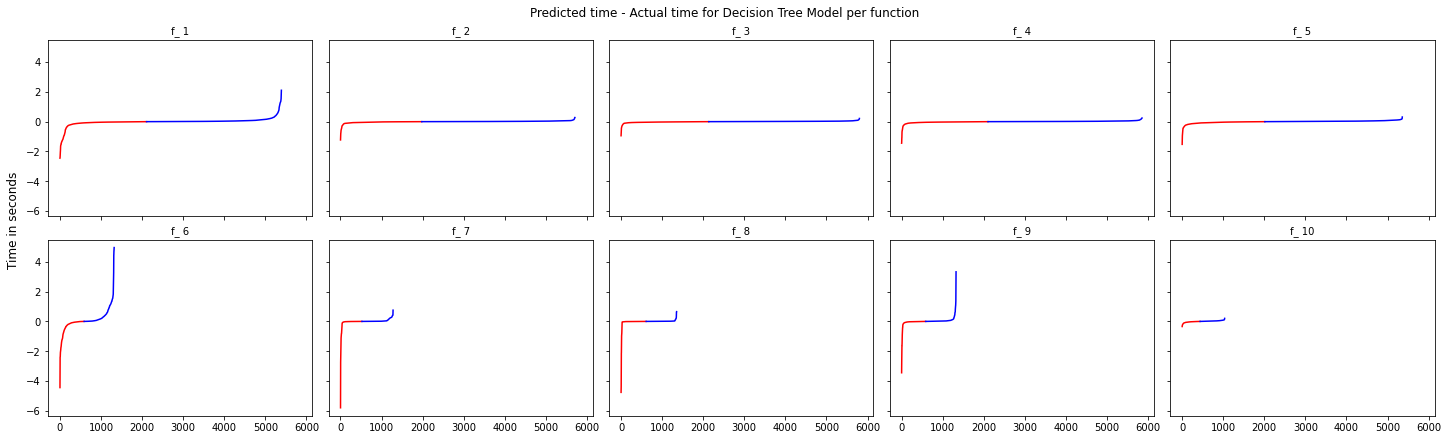

In [20]:

# Fixing random state for reproducibility
np.random.seed(19680801)


# fake data
fs = 10  # fontsize

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 6),constrained_layout=True,
                        sharex=True, sharey=True)
index1 = 0
index2 = 0

for i in range(1, len(data.functions) + 1):
    # axs[index1, index2].violinplot(data.functions[i].models['decision_tree_model'].difference[-1:], pos[-1:], points=len(data.functions[i].x_test), vert=False, 
    #                 showmeans=True, showextrema=True, showmedians=True,
    #                 quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
    axs[index1, index2].plot([i for i in range(1, data.functions[i].models['decision_tree_model'].underpredicted + 1)],data.functions[i].models['decision_tree_model'].difference[:data.functions[i].models['decision_tree_model'].underpredicted],  c="r")
    axs[index1, index2].plot([i for i in range(data.functions[i].models['decision_tree_model'].underpredicted, len(data.functions[i].models['decision_tree_model'].difference))], data.functions[i].models['decision_tree_model'].difference[data.functions[i].models['decision_tree_model'].underpredicted:len(data.functions[i].models['decision_tree_model'].difference)], c="b")
    axs[index1, index2].set_title(data.labels[i - 1], fontsize=fs)
    if index2 ==4:
        index1 = index1 + 1
    index2 = (index2 + 1) % 5



# change color for negative or positive
# add line 

# try a box-plot
fig.suptitle("Predicted time - Actual time for Decision Tree Model per function")
fig.supylabel('Time in seconds')

plt.show()

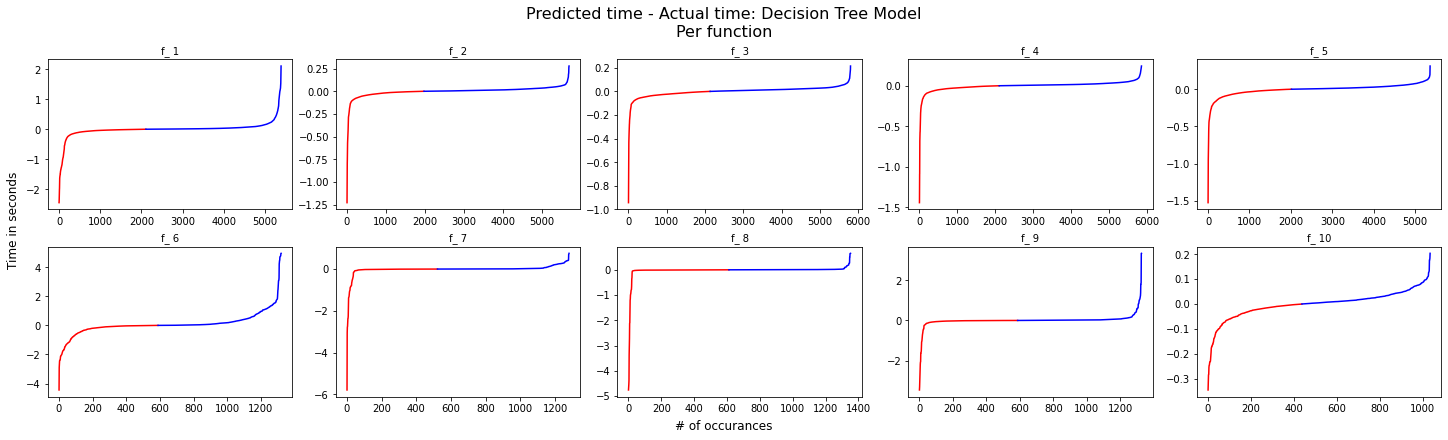

In [27]:

# Fixing random state for reproducibility
np.random.seed(19680801)


# fake data
fs = 10  # fontsize

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 6),constrained_layout=True)
index1 = 0
index2 = 0

for i in range(1, len(data.functions) + 1):
    # axs[index1, index2].violinplot(data.functions[i].models['decision_tree_model'].difference[-1:], pos[-1:], points=len(data.functions[i].x_test), vert=False, 
    #                 showmeans=True, showextrema=True, showmedians=True,
    #                 quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
    axs[index1, index2].plot([i for i in range(1, data.functions[i].models['decision_tree_model'].underpredicted + 1)],data.functions[i].models['decision_tree_model'].difference[:data.functions[i].models['decision_tree_model'].underpredicted],  c="r")
    axs[index1, index2].plot([i for i in range(data.functions[i].models['decision_tree_model'].underpredicted, len(data.functions[i].models['decision_tree_model'].difference))], data.functions[i].models['decision_tree_model'].difference[data.functions[i].models['decision_tree_model'].underpredicted:len(data.functions[i].models['decision_tree_model'].difference)], c="b")
    axs[index1, index2].set_title(data.labels[i - 1], fontsize=fs)
    if index2 == 4:
        index1 = index1 + 1
    index2 = (index2 + 1) % 5


# change color for negative or positive
# add line 

# try a box-plot
fig.suptitle("Predicted time - Actual time: Decision Tree Model\nPer function", fontsize=16)
fig.supylabel('Time in seconds')
fig.supxlabel("Number of occurances")
plt.savefig("prediction_vs_actual_time_padded.png")
plt.show()

In [ ]:
average_buffers = []
max_buffers = []
average_maes = []
max_maes = []
average_underpredicting = []
average_overpredicting = []
new_differences = []


for i in range(1, len(data.functions) + 1):
    max_buffers.append(max(data.functions[i].models['decision_tree_model'].difference))
    average_buffers.append(sum(data.functions[i].models['decision_tree_model'].difference[-(data.functions[i].models['decision_tree_model'].underpredicted):])/data.functions[i].models['decision_tree_model'].underpredicted)
    new_y_values_average =  [data.functions[i].models['decision_tree_model'].predicted_y_values[j] + average_buffers[i-1] for j in range(0, len(data.functions[i].models['decision_tree_model'].predicted_y_values))]
    new_y_values_max = [j + max_buffers[i-1] for j in data.functions[i].models['decision_tree_model'].predicted_y_values]
    max_maes.append(mean_absolute_error(new_y_values_max, data.functions[i].y_test))
    average_maes.append(mean_absolute_error(new_y_values_average, data.functions[i].y_test))
 
    new_differences.append((new_y_values_average - data.functions[i].y_test.squeeze()).tolist())
    new_differences[i - 1].sort()
    average_underpredicting.append(len([j for j in new_differences[i - 1] if j <= 0]))

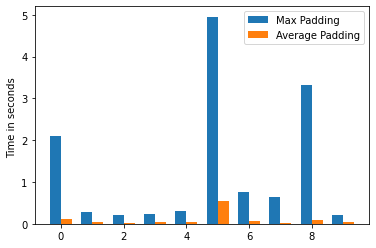

In [ ]:
width = 0.35  

fig, ax = plt.subplots()

x = np.arange(len(data.labels)) 

ax.bar(x- width/2, max_buffers, width, label='Max Padding')
ax.bar(x+ width/2, average_buffers, width,
       label='Average Padding')

ax.set_ylabel('Time in seconds ')
#ax.set_title('overpredicting vs underpredicted for Decision Tree Model')
ax.legend()

plt.show()

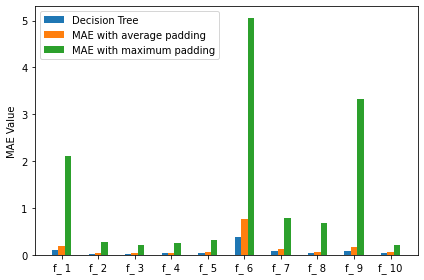

In [ ]:
x = np.arange(len(data.labels)) * 2
width = 0.35 * 3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, data.model_values['decision_tree_model']['mae_values'], width/3, label='Decision Tree')
rects2 = ax.bar(x , average_maes, width/3, label='MAE with average padding')
rects3 = ax.bar(x + width/3, max_maes, width/3, label='MAE with maximum padding')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE Value')
#ax.set_title('MAE Value for linear model vs decision tree model')
ax.set_xticks(x)
ax.set_xticklabels(data.labels)
ax.legend()


fig.tight_layout()

plt.show()

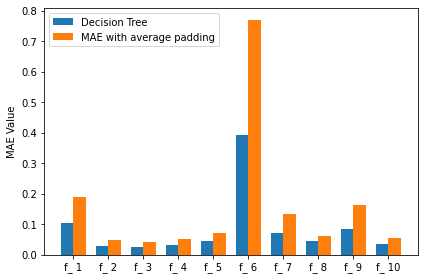

In [ ]:
x = np.arange(len(data.labels)) 
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data.model_values['decision_tree_model']['mae_values'], width, label='Decision Tree')
rects2 = ax.bar(x + width/2, average_maes, width, label='MAE with average padding')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE Value')
#ax.set_title('MAE Value for linear model vs decision tree model')
ax.set_xticks(x)
ax.set_xticklabels(data.labels)
ax.legend()


fig.tight_layout()

plt.show()

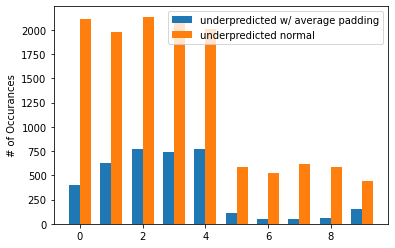

In [ ]:
width = 0.35  

fig, ax = plt.subplots()

x = np.arange(len(data.labels)) 

ax.bar(x- width/2, average_underpredicting, width, label='underpredicted w/ average padding')
ax.bar(x+ width/2, data.model_values['decision_tree_model']['underpredicted'], width,
       label='underpredicted normal')

ax.set_ylabel('# of Occurances')
#ax.set_title('overpredicting vs underpredicted for Decision Tree Model')
ax.legend()

plt.show()

NameError: name 'new_differences' is not defined

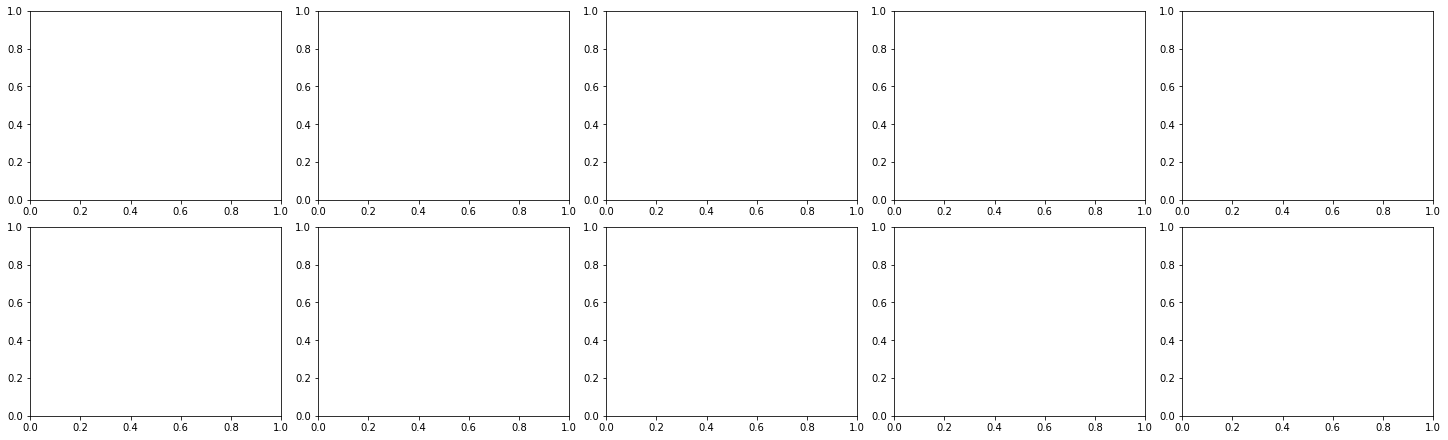

In [ ]:
fs = 10  # fontsize

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 6),constrained_layout=True)
index1 = 0
index2 = 0

for i in range(1, len(data.functions) + 1):
    # axs[index1, index2].violinplot(data.functions[i].models['decision_tree_model'].difference[-1:], pos[-1:], points=len(data.functions[i].x_test), vert=False, 
    #                 showmeans=True, showextrema=True, showmedians=True,
    #                 quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
    differences = new_differences[i - 1]
 
    axs[index1, index2].plot([j for j in range(1, average_underpredicting[i-1] + 1)], differences[:average_underpredicting[i-1]],  c="r")
    axs[index1, index2].plot([j for j in range(average_underpredicting[i-1], len(differences))], differences[average_underpredicting[i-1]:len(differences)], c="b")
    axs[index1, index2].set_title(data.labels[i - 1], fontsize=fs)
    if index2 == 4:
        index1 = index1 + 1
    index2 = (index2 + 1) % 5


# change color for negative or positive
# add line 

# try a box-plot
fig.title("Predicted Time - Actual time for time prediction Decision Tree Model")
fig.subtitle("Padding per function")
fig.supylabel('Time in seconds')

plt.savefig("prediction_vs_actual_time_padded.png")
plt.show()

In [ ]:
# Add the max value that will make overfitting 100%
# Add the average value that will make one overfitting

# Add charge of average mae value for overitting underpredicting

## Pre-pruning

In [ ]:
functionID = 1
mae_values = []
overfit = []
underfit = []
number_of_nodes = [i for i in range(10, 2000, 5)]
models = []

for i in range(0, len(number_of_nodes)):
    decision_tree_model = DecisionTreeRegressor(random_state=12,max_leaf_nodes=number_of_nodes[i])
    model = ml_analysis_helper.Model('decision_tree_model_' + str(i), decision_tree_model, data.functions[functionID])
    models.append(model)
    mae_values.append(model.mae)
    overfit.append(model.overpredicted)
    underfit.append(model.underpredicted)

In [ ]:
print(min(mae_values))
print(min(underfit))
print(ml_analysis_helper.optimize(models,85))

0.1034085270041213
2027
[0.9107298825842869, <helper_functions.ml_analysis_helper.Model object at 0x000002399392AAF0>, 2027]


## Post-pruning

In [ ]:
functionID = 1
mae_values = []
overfit = []
underfit = []
number_of_nodes = [i for i in range(10, 2000, 5)]
models = []

for i in range(0, len(number_of_nodes)):
    decision_tree_model = DecisionTreeRegressor(random_state=12,max_leaf_nodes=number_of_nodes[i])
    model = ml_analysis_helper.Model('decision_tree_model_' + str(i), decision_tree_model, data.functions[functionID])
    models.append(model)
    mae_values.append(model.mae)
    overfit.append(model.overpredicted)
    underfit.append(model.underpredicted)

In [ ]:
print(min(mae_values))
print(min(underfit))
print(ml_analysis_helper.optimize(models,85))

0.1034085270041213
2027
[0.9107298825842869, <helper_functions.ml_analysis_helper.Model object at 0x00000239A06E2070>, 2027]


# Linear Regression

In [ ]:
for function in data.functions:
    linear_model =  LinearRegression(fit_intercept = True, copy_X = True, n_jobs = len(data.functions[function].x_train.columns))
    model = ml_analysis_helper.Model('linear_model', linear_model, data.functions[function])
    data.functions[function].add_model(model)

In [ ]:
data.group_function_values('linear_model')

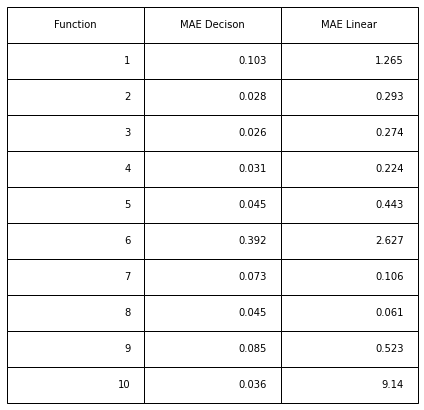

In [ ]:
temp_mae = data.model_values['linear_model']['mae_values']
for function in data.functions:
    mae_function_values[function - 1].append(round(temp_mae[function - 1], 3))

fig, ax = plt.subplots()


ax.axis('off')
fig.patch.set_visible(False)
fig.tight_layout()
table = ax.table(cellText=mae_function_values ,colLabels=['Function', 'MAE Decison', 'MAE Linear'],loc='center')
table.set_fontsize(10)
table.scale(1,3)
plt.show()

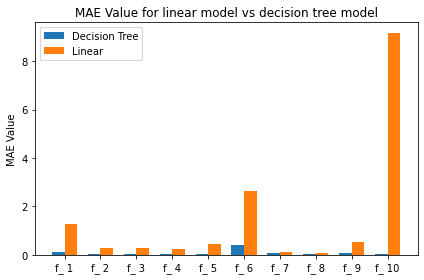

In [ ]:
x = np.arange(len(data.labels)) 
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data.model_values['decision_tree_model']['mae_values'], width, label='Decision Tree')
rects2 = ax.bar(x + width/2, data.model_values['linear_model']['mae_values'], width, label='Linear')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE Value')
ax.set_title('MAE Value for linear model vs decision tree model')
ax.set_xticks(x)
ax.set_xticklabels(data.labels)
ax.legend()


fig.tight_layout()

plt.show()

# Linear between functions

## Simulating runs

In [ ]:
num_runs = 10
runs = []

for i in range(0, num_runs):
    runs.append(random.sample(data.functions.keys(), random.randrange(2, 6)))

data.split_into_runs(runs)

NameError: name 'random' is not defined

# E2E prediction based on func 1 input

In [ ]:
for run in data.runs:
    decision_tree_model = DecisionTreeRegressor(random_state=12)
    model = ml_analysis_helper.Model('decision_tree_model_run' , decision_tree_model, data.runs[run])
    data.runs[run].add_model(model)

In [ ]:
data.group_run_values("decision_tree_model_run")

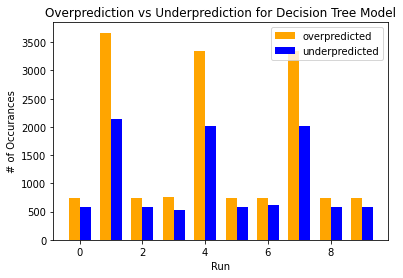

In [ ]:
width = 0.35  

fig, ax = plt.subplots()

x = np.arange(len(data.run_labels)) 

ax.bar(x - width/2, data.model_values['decision_tree_model_run']['overpredicted'], width, label='overpredicted', color="orange")
ax.bar(x + width/2, data.model_values['decision_tree_model_run']['underpredicted'], width,
       label='underpredicted',color="blue")
ax.set_xlabel('Run')
ax.set_ylabel('# of Occurances')
ax.set_title('Overprediction vs Underprediction for Decision Tree Model')
ax.legend()

plt.show()

# Stage Prediction based on all func input 